In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
PATH = 'C:\\Users\\marco\\Google Drive\\ComputerScience\\Visão Computacional\\images\\'

def getHomography(kpsA, kpsB, descriptorsA, descriptorsB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC, reprojThresh)

        return H
    else:
        return None

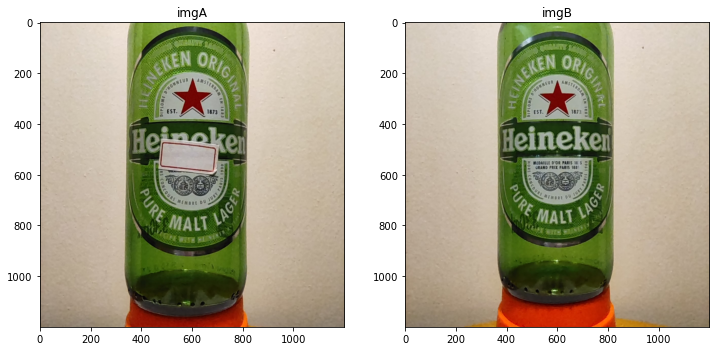

In [2]:
imgB = plt.imread(PATH + '0\\0_v4_0.jpg')
imgA = plt.imread(PATH + '2\\2_v0_0.jpg')
fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(imgA)
axs[0].set_title('imgA')
axs[1].imshow(imgB)
axs[1].set_title('imgB')
plt.show()

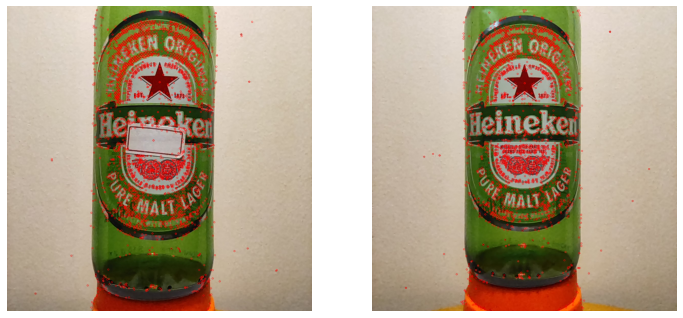

In [3]:
sift = cv2.SIFT_create()
kptsA, descA = sift.detectAndCompute(imgA, None)
kptsB, descB = sift.detectAndCompute(imgB, None)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(cv2.drawKeypoints(imgA, kptsA,
                               None, color=(255, 0, 0)))
axs[0].axis('off')
axs[1].imshow(cv2.drawKeypoints(imgB, kptsB,
                               None, color=(255, 0, 0)))
axs[1].axis('off')
plt.show()

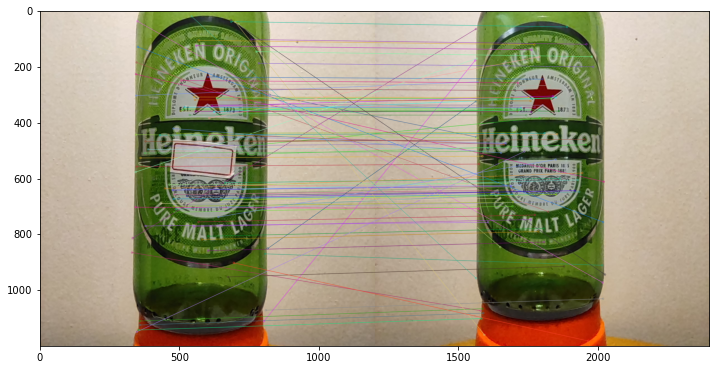

In [15]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
best_matches = bf.match(descA, descB)
matches = sorted(best_matches, key=lambda x:x.distance)

img_match = cv2.drawMatches(imgA, kptsA,
                            imgB, kptsB,
                            matches[:100], None,
                            flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(12, 12))
plt.imshow(img_match)
plt.show()

In [35]:
H = getHomography(kptsA, kptsB,
                  descA, descB,
                  matches, reprojThresh=4)

H

array([[ 8.89779577e-01,  1.31708626e-02,  4.63897686e+01],
       [-3.55644076e-02,  9.20897835e-01,  4.06385873e+01],
       [-4.86965724e-05,  8.43384619e-06,  1.00000000e+00]])

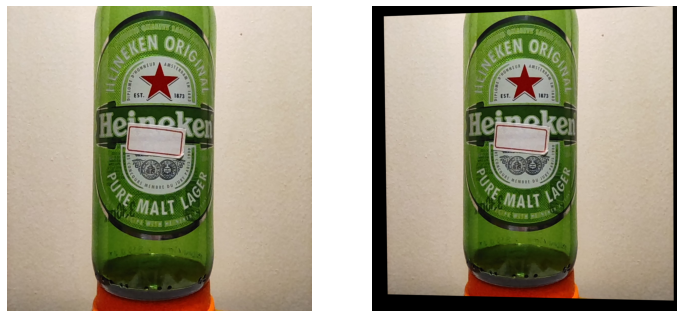

In [36]:
width = imgB.shape[1]
height = imgB.shape[0]
imgA_transformed = cv2.warpPerspective(imgA, H, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(imgA)
axs[0].axis('off')
axs[1].imshow(imgA_transformed)
axs[1].axis('off')
plt.show()

In [37]:
kernel = (5, 5)
imgA_smooth = cv2.GaussianBlur(imgA_transformed, kernel, cv2.BORDER_DEFAULT)
imgB_smooth = cv2.GaussianBlur(imgB, kernel, cv2.BORDER_DEFAULT)

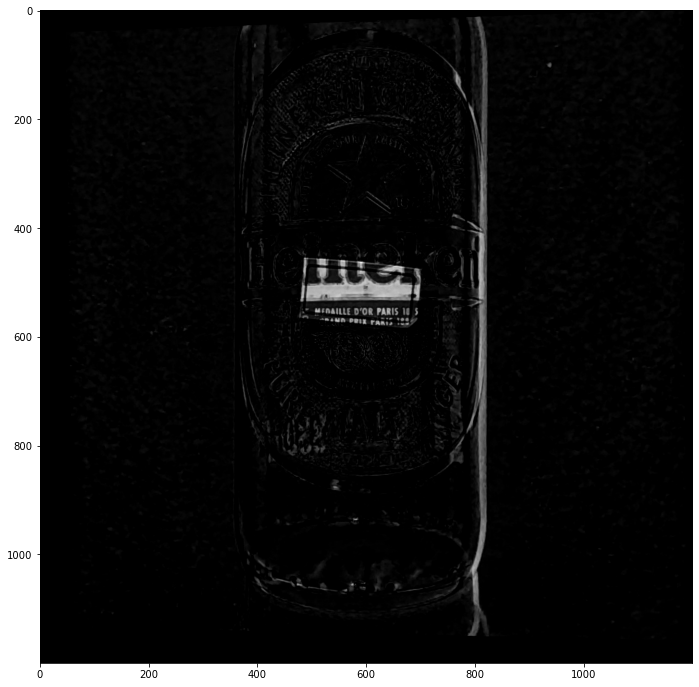

In [38]:
img_diff = cv2.subtract(imgA_transformed, imgB)
img_diff_gray = cv2.cvtColor(img_diff, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(12, 12))
plt.imshow(img_diff_gray, 'gray')
plt.show()

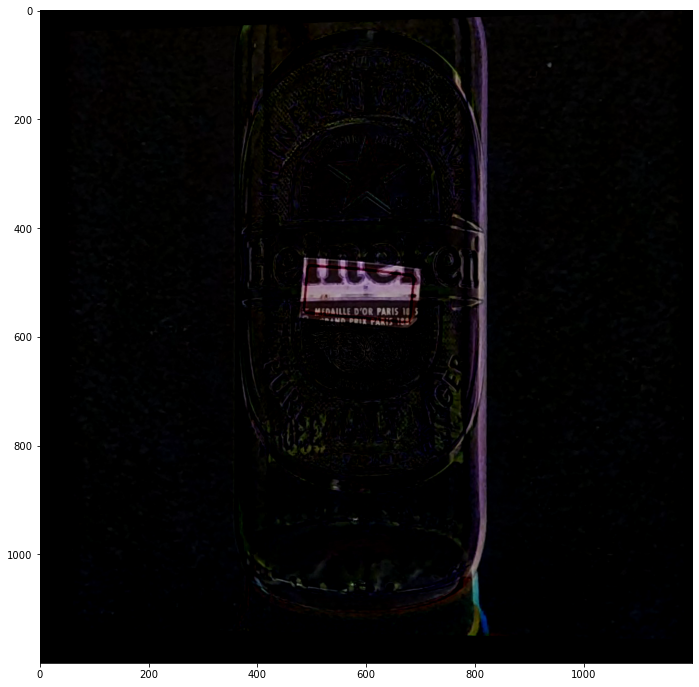

In [20]:
img_diff = cv2.subtract(imgA_transformed, imgB)
plt.figure(figsize=(12, 12))
plt.imshow(img_diff)
plt.show()

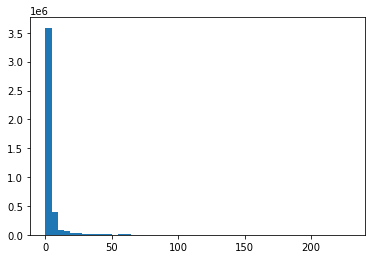

In [10]:
hist = plt.hist(img_diff.flatten(), bins=50)

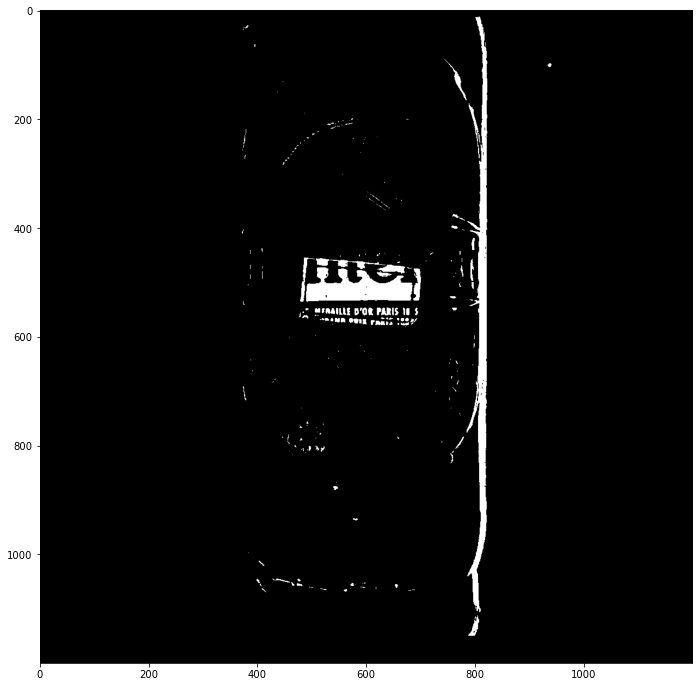

In [11]:
t, img_diff_t = cv2.threshold(img_diff_gray, 50, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12, 12))
plt.imshow(img_diff_t, 'gray')
plt.show()

In [12]:
from PIL import Image

im = Image.fromarray(img_diff)
im.save('imgdiff.png')